In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

/home/sean/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1. 导入数据集

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

2. 观察图片

In [3]:
train_images = np.array(train_data.iloc[:,1:])
train_labels = np.array(train_data.iloc[:,0])

In [4]:
print(train_images.shape, train_labels.shape)

(42000, 784) (42000,)


In [5]:
train_images = train_images.reshape((train_images.shape[0], 28, 28))

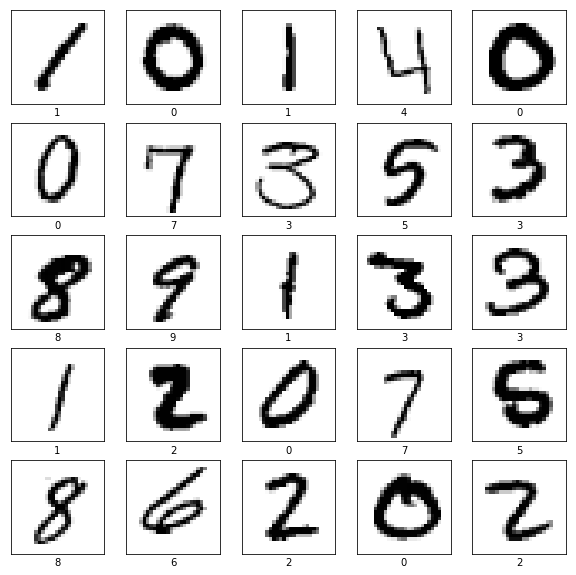

In [6]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(train_labels[i])

3. 提取数据集

In [7]:
train_data, validation_data = train_test_split(train_data, test_size = 0.1, shuffle=True)

x_train = (train_data.iloc[:,1:].values).astype('float32')
y_train = np.array(train_data.iloc[:,0]).astype('float32')
x_val = validation_data.iloc[:, 1:].values.astype('float32')
y_val = np.array(validation_data.iloc[:,0]).astype('float32')
x_test = test_data.iloc[:, :].values.astype('float32')

In [8]:
x_train.shape

(37800, 784)

# 下面三步非常重要，将其normalize之后，能极大的降低训练的难度!!!　

In [9]:
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

4. 训练

In [12]:
from tensorflow import keras
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, batch_size=100, validation_data=(x_val, y_val), verbose=True)
val_loss, val_acc = model.evaluate(x_val, y_val)
print("val_acc : ", val_acc)

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 4s 117us/step - loss: 0.4468 - acc: 0.8600 - val_loss: 0.1861 - val_acc: 0.9469
Epoch 2/20
37800/37800 [==============================] - 4s 111us/step - loss: 0.1945 - acc: 0.9412 - val_loss: 0.1358 - val_acc: 0.9595
Epoch 3/20
37800/37800 [==============================] - 4s 113us/step - loss: 0.1511 - acc: 0.9542 - val_loss: 0.1187 - val_acc: 0.9648
Epoch 4/20
37800/37800 [==============================] - 4s 112us/step - loss: 0.1228 - acc: 0.9616 - val_loss: 0.1130 - val_acc: 0.9683
Epoch 5/20
37800/37800 [==============================] - 4s 114us/step - loss: 0.1105 - acc: 0.9656 - val_loss: 0.1020 - val_acc: 0.9712
Epoch 6/20
37800/37800 [==============================] - 4s 114us/step - loss: 0.0986 - acc: 0.9685 - val_loss: 0.0953 - val_acc: 0.9721
Epoch 7/20
37800/37800 [==============================] - 5s 121us/step - loss: 0.0922 - acc: 0.9709 - val_loss: 0.0955 - v

In [13]:
history = history.history

In [14]:
history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [15]:
acc = history['acc']
loss = history['loss']
val_acc = history['val_acc']
val_loss = history['val_loss']
epochs = range(1, len(acc) + 1)

作出ａｃｃ和ｌｏｓｓ曲线

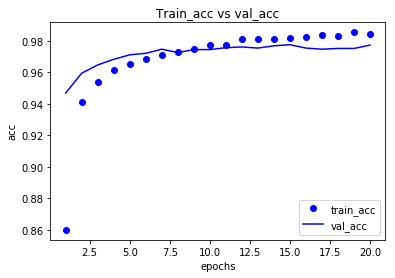

In [16]:
plt.plot(epochs, acc, 'bo', label='train_acc')
plt.plot(epochs, val_acc, 'b', label='val_acc')
plt.title("Train_acc vs val_acc")
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()

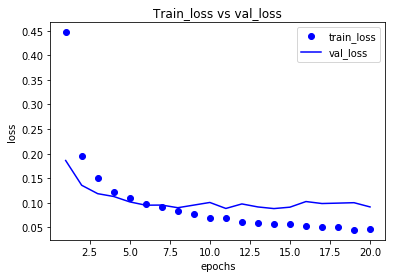

In [17]:
plt.clf()
plt.plot(epochs, loss, 'bo', label='train_loss')
plt.plot(epochs, val_loss, 'b', label='val_loss')
plt.title("Train_loss vs val_loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

预测出结果并保存到　submission.csv

In [18]:
predications = np.argmax(model.predict(x_test), 1)
result = pd.DataFrame({'ImageId': np.arange(len(predications)) + 1, 'Label': predications})
result.to_csv('submission.csv', index=False)

In [24]:
#!kaggle competitions submit -c digit-recognizer -f submission.csv -m "Message"

public_score为97.702 下面考虑进一步改进

作图画出val上各个置信概率

In [25]:
predications = model.predict(x_val)

In [26]:
def plot_image(i, predications, images, labels):
    predict = predications[i]
    x = images[i].reshape((28, 28))
    y = int(labels[i])
    plt.imshow(x, cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    
    predict_label = np.argmax(predict)
    if predict_label == y:
        color = 'black'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(predict_label, 100*np.max(predict), y), color=color)
    
def plot_value_array(i, predications, labels):
    predications_array = predications[i]
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predications_array, color="#777777")
    
    y = int(labels[i])
    thisplot[np.argmax(predications_array)].set_color('red')
    thisplot[y].set_color('blue')

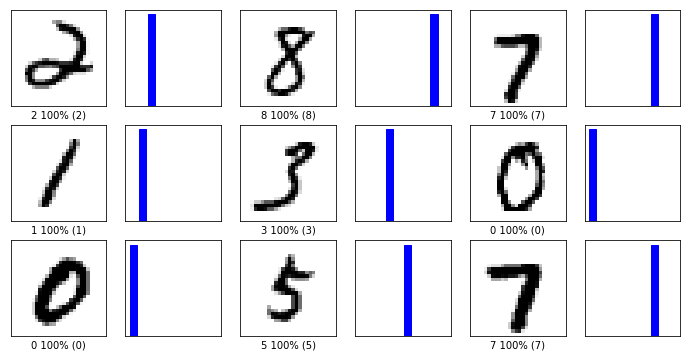

In [27]:
row_images = 3
col_images = 3
num_images = row_images * col_images
plt.figure(figsize=(2*2*col_images, 2*row_images))
for i in range(num_images):
    plt.subplot(row_images, 2*col_images, 2*i+1)
    plot_image(i, predications, x_val, y_val)
    plt.subplot(row_images, 2*col_images, 2*i+2)
    plot_value_array(i, predications, y_val)